<a href="https://colab.research.google.com/github/rajeshmore1/Auto-MPG-Clustering-and-Regression/blob/main/Unsupervised_Learning_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon
• Attribute Information:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

1. Import and warehouse data: [ Score: 3 points ]

• Import all the given datasets and explore shape and size.

• Merge all datasets onto one and explore final shape and size.

• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

• Import the data from above steps into python.

In [2]:
import pandas as pd
df1 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Ved 27 Sept/Part1 - Car-Attributes.json')
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ved 27 Sept/Part1 - Car name.csv')
df2.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
# concatenating df1 and df2 along rows
final_df = pd.concat([df1, df2], axis=1)

In [5]:
# Rows=398 columns = 9
print(final_df.shape)
print(final_df.size)

(398, 9)
3582


In [6]:
# converting final df into csv file
final_df.to_csv("final_df.csv")
final_df.to_excel("final_df.xlsx")
final_df.to_json("final_df.json")


In [7]:
#importing merged pdf
df = pd.read_csv("final_df.csv")

In [8]:
df.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [9]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [10]:
df.sample(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
222,17.0,8,260.0,110,4060,19.0,77,1,oldsmobile cutlass supreme
145,32.0,4,83.0,61,2003,19.0,74,3,datsun 710


2. Data cleansing: [ Score: 3 points ]

• Missing/incorrect value treatment

• Drop attribute/s if required using relevant functional knowledge

• Perform another kind of corrections/treatment on the data.

In [11]:
#no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [12]:
# no null entry
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [13]:
df.describe()


,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
pip install -U klib


     |████████████████████████████████| 22.3 MB 34 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [15]:
import klib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler, normalize

GridSpec(6, 2)

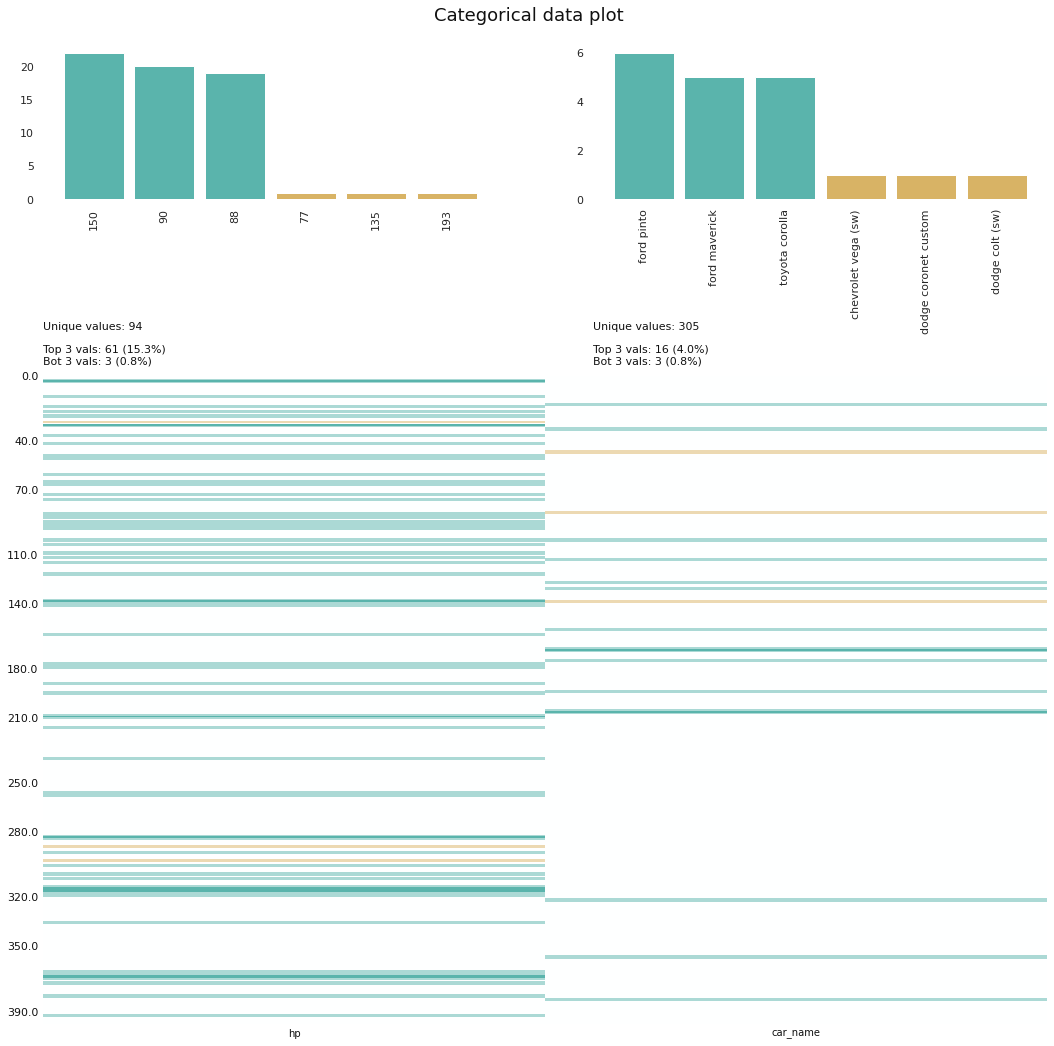

In [16]:
klib.cat_plot(df)

In [17]:
klib.corr_mat(df)

,mpg,cyl,disp,wt,acc,yr,origin
mpg,1.00,-0.78,-0.80,-0.83,0.42,0.58,0.56
cyl,-0.78,1.00,0.95,0.90,-0.51,-0.35,-0.56
disp,-0.80,0.95,1.00,0.93,-0.54,-0.37,-0.61
wt,-0.83,0.90,0.93,1.00,-0.42,-0.31,-0.58
acc,0.42,-0.51,-0.54,-0.42,1.00,0.29,0.21
yr,0.58,-0.35,-0.37,-0.31,0.29,1.00,0.18
origin,0.56,-0.56,-0.61,-0.58,0.21,0.18,1.00


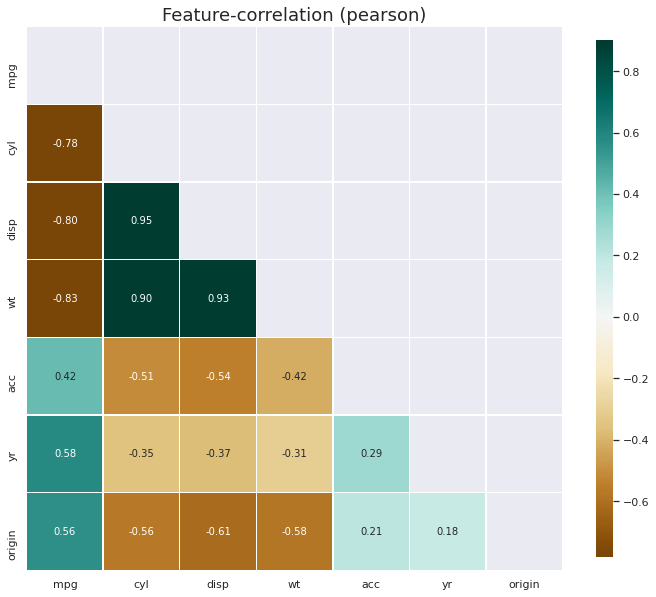

In [18]:
klib.corr_plot(df)

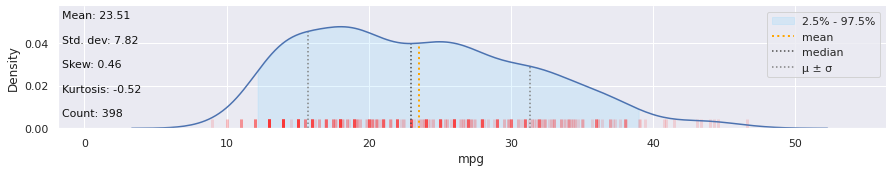

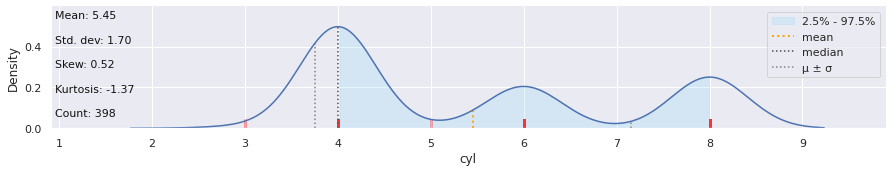

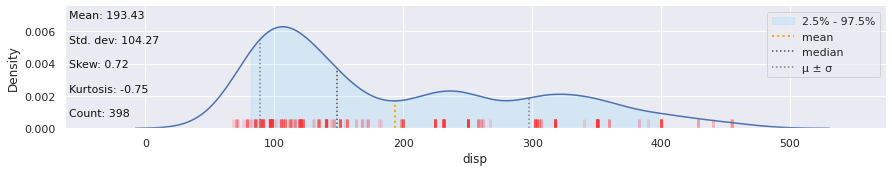

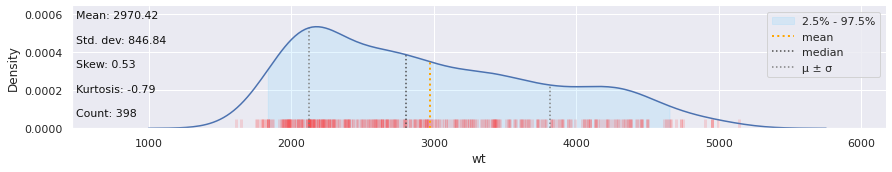

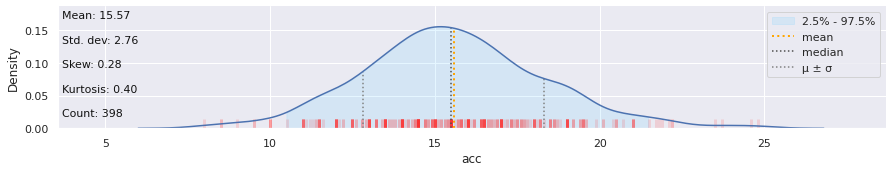

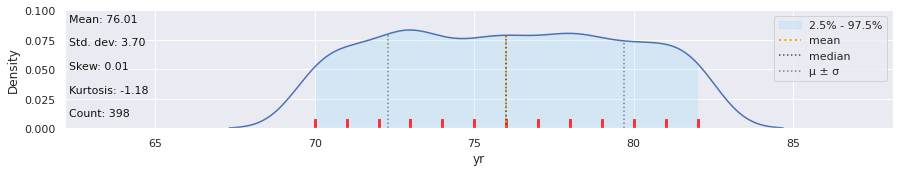

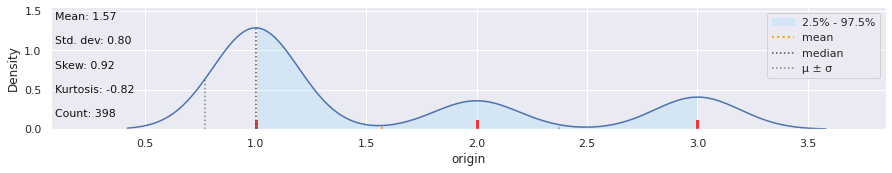

In [19]:
klib.dist_plot(df)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


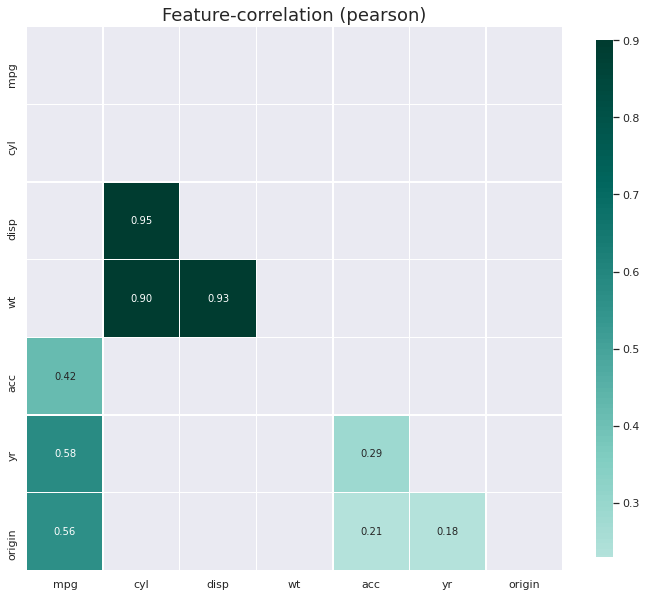

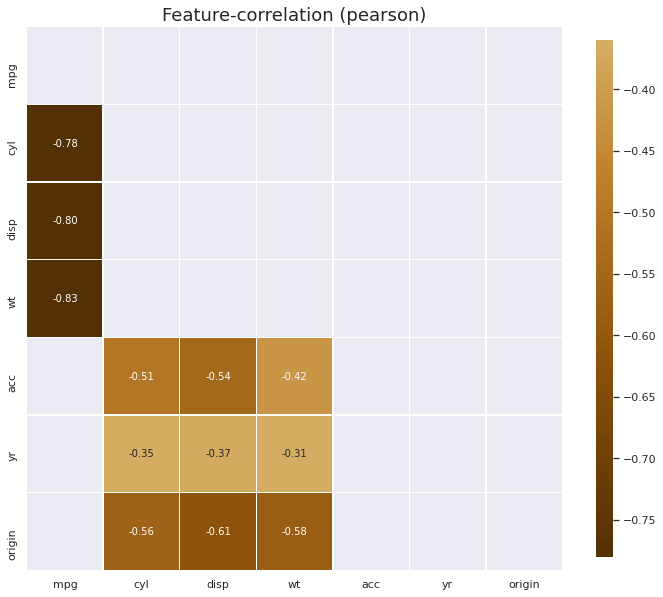

In [20]:
klib.corr_plot(df, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df, split='neg') # displaying only negative correlations

In [21]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

In [22]:
klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (398, 9)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.02 MB (-66.67%)



,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [23]:
#df['hp'] = df['hp'].str.replace(r'\D', '').astype(int)
#df = df.assign(result=df['hp'].str.replace(r'\D', ''))
#df['result'] = df['result'].str.replace(r'\D', '').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [24]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['hp']= label_encoder.fit_transform(df['hp'])
df['car_name']= label_encoder.fit_transform(df['car_name'])

df['hp'].unique()


array([15, 33, 27, 22, 40, 45, 44, 46, 38, 35, 32, 89, 91, 79, 82, 48, 81,
       84,  8, 41, 43, 39, 93,  0,  3, 36, 29, 37,  6, 67, 80, 65, 70, 60,
       64, 55, 74, 53, 42, 30,  7, 86, 24, 19, 31, 34, 88,  4, 47, 50, 69,
       85, 12, 62, 77, 72, 51, 56, 87, 25, 14, 90, 66, 92,  9, 52, 75, 73,
       11, 28,  1,  5, 63, 54, 26, 83, 58, 49, 61, 21,  2, 13, 17, 20, 18,
       23, 71, 57, 16, 78, 59, 68, 10, 76])

In [25]:
df['car_name'].unique()

array([ 49,  36, 231,  14, 161, 141,  54, 223, 241,   1, 101, 215,  57,
        30, 274, 220,   8, 150,  95, 282, 211,  16, 258,  22,   7, 133,
        68, 112, 163,  65, 271, 156, 232, 162,  10, 242, 116, 129, 250,
         9,  64, 243, 151, 187, 208, 210, 123, 267,  76, 286, 218, 272,
       105, 293,  63, 158,   2, 192,  31, 203,  75, 183,  11,  48, 143,
       233, 295, 283, 212, 253, 157,  85, 279, 104, 268,  25,  55, 142,
       109, 193,  44, 148, 222,  74,  29,   0, 235,  62, 292, 128, 219,
       207, 263,  87, 174, 188, 121,  59, 244, 124, 209,  17, 294, 113,
       260, 276, 204,  61,  92,  50, 234,  27, 110,  21, 284,  88, 103,
       122, 167, 261, 127, 236, 194,  42, 224,  24,  41, 221,  34,  60,
       154, 266, 240, 287,  12, 296, 171, 125,  40, 254, 108,  51,  66,
       302, 100, 145, 252,  13,  91, 297, 239, 186,  39,  67, 132, 111,
       165,  32, 256, 216,  94, 202, 117, 189,  53,  35, 238, 144, 245,
        58,  70, 160, 288, 251, 269, 155, 107, 262,  89,  23, 18

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature         VIF
0       mpg   53.415170
1       cyl  128.713715
2      disp   92.877519
3        hp    5.746982
4        wt  156.857608
5       acc   51.185267
6        yr  263.887126
7    origin    8.379933
8  car_name    4.406247


In [43]:
import sklearn.cluster as cluster
from tqdm import tqdm

from sklearn.metrics import silhouette_score


In [36]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [37]:
cluster_ = df.copy()


In [38]:
cluster_[cluster_.columns] = scale.fit_transform(cluster_)


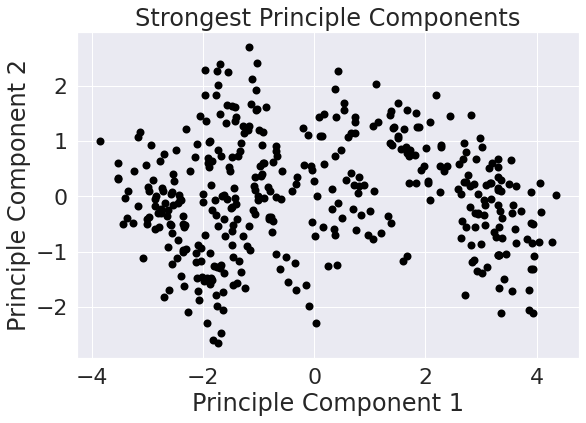

In [39]:
from sklearn.decomposition import PCA
import seaborn as sb

pca = PCA(2)
pca_result = pca.fit_transform(cluster_) 
sb.set(style="darkgrid", rc={'figure.figsize':(9,6)}, font_scale=2)
plt.scatter(x=pca_result[:,0], y=pca_result[:,1], color="black", lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Strongest Principle Components")
plt.show()

In [41]:
import sklearn.cluster as cluster

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(cluster_)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


In [44]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(cluster_)
    silhouette[i] = silhouette_score(cluster_, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:05<00:00,  1.52it/s]


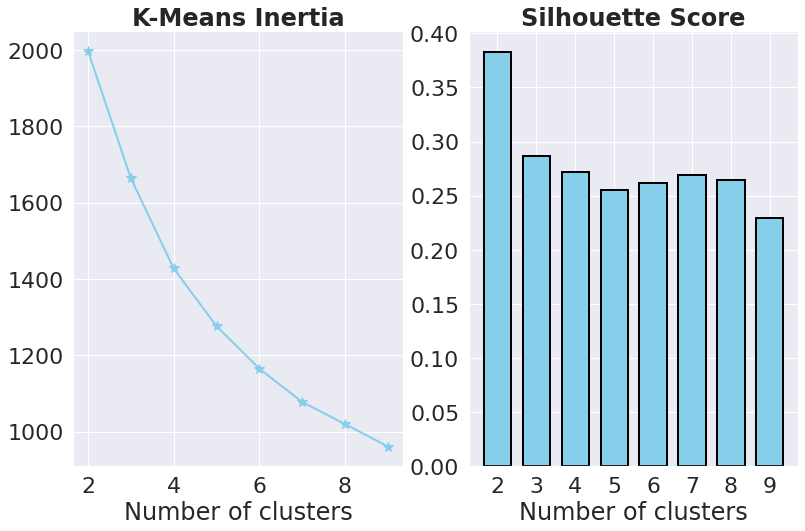

In [45]:
sb.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [ ]:
#Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
# We find two clusters based on Silhoatte score

In [46]:
kmeans= cluster.KMeans(n_clusters=2, random_state=17, init='k-means++')
kmeans_labels = kmeans.fit_predict(cluster_)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
pd.Series(kmeans_labels).value_counts()

0    238
1    160
dtype: int64

Text(0.5, 1.0, 'Clustered Data')

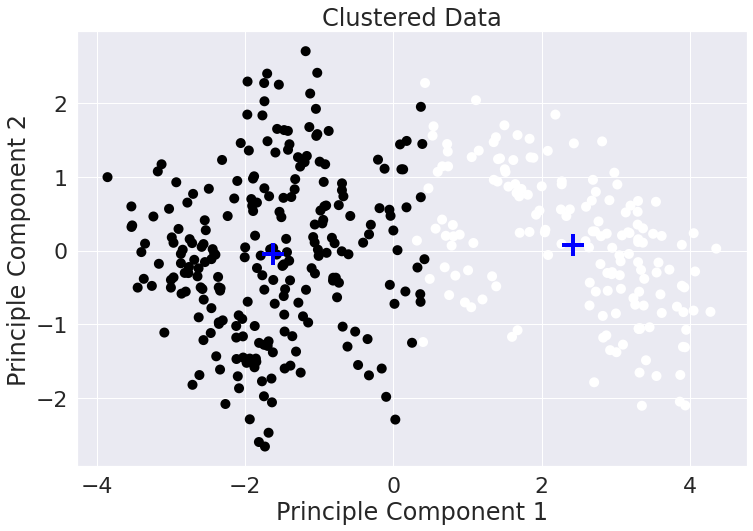

In [47]:
sb.set(style='darkgrid', rc={'figure.figsize':(12,8)},font_scale=2)
plt.scatter(x=pca_result[:,0], y=pca_result[:,1], c=kmeans_labels, cmap="CMRmap", lw=4)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Clustered Data")

In [60]:
kmeans_labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [61]:
df_labels = pd.DataFrame(kmeans_labels)
df_labels
df_labels.to_excel('New_labels.xlsx', index=None)

In [62]:
df_new = pd.read_excel("New_labels.xlsx")


In [63]:
# concatenating df1 and df2 along rows
final_df = pd.concat([df, df_new], axis=1)

In [64]:
final_df.head(15)


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,0
0,18.0,8,307.0,15,3504,12.0,70,1,49,1
1,15.0,8,350.0,33,3693,11.5,70,1,36,1
2,18.0,8,318.0,27,3436,11.0,70,1,231,1
3,16.0,8,304.0,27,3433,12.0,70,1,14,1
4,17.0,8,302.0,22,3449,10.5,70,1,161,1
5,15.0,8,429.0,40,4341,10.0,70,1,141,1
6,14.0,8,454.0,45,4354,9.0,70,1,54,1
7,14.0,8,440.0,44,4312,8.5,70,1,223,1
8,14.0,8,455.0,46,4425,10.0,70,1,241,1
9,15.0,8,390.0,38,3850,8.5,70,1,1,1


In [65]:
final_df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name', 0], dtype='object')

In [66]:
final_df.columns = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name', 'clusters']


In [67]:
final_df.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,clusters
0,18.0,8,307.0,15,3504,12.0,70,1,49,1
1,15.0,8,350.0,33,3693,11.5,70,1,36,1


In [72]:
final_df.shape

(398, 10)

In [68]:
# we are creating two dataset for each cluster to fit regression models on each of these dataset
cluster1_df = final_df[final_df['clusters']==0]
cluster2_df = final_df[final_df['clusters']==1]


In [69]:
cluster1_df.shape

(238, 10)

In [70]:
cluster2_df.shape

(160, 10)

# Heirarchical Clustering


How should we Choose the Number of Clusters in Hierarchical Clustering? 
A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

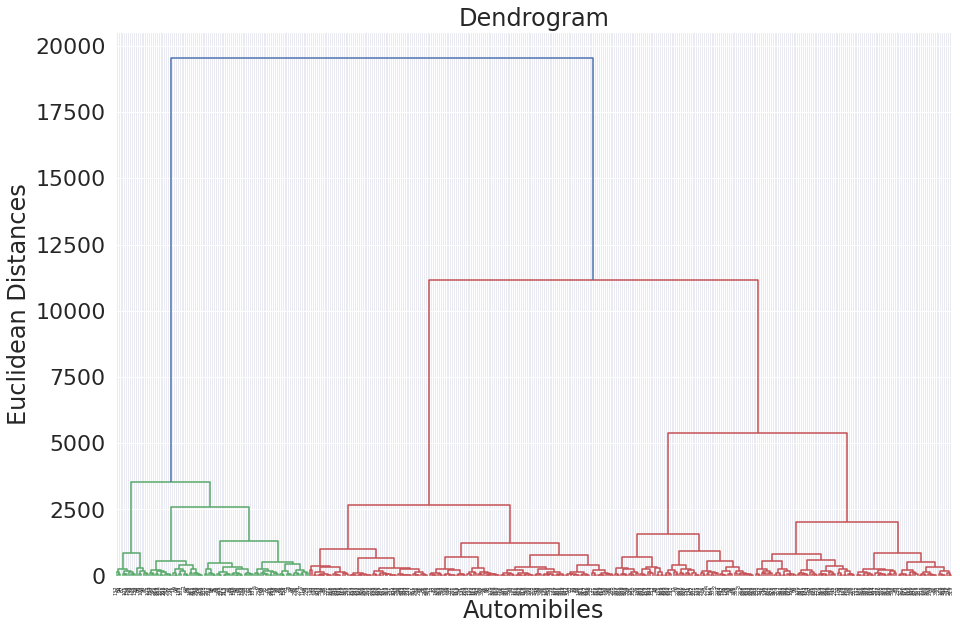

In [58]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Automibiles')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

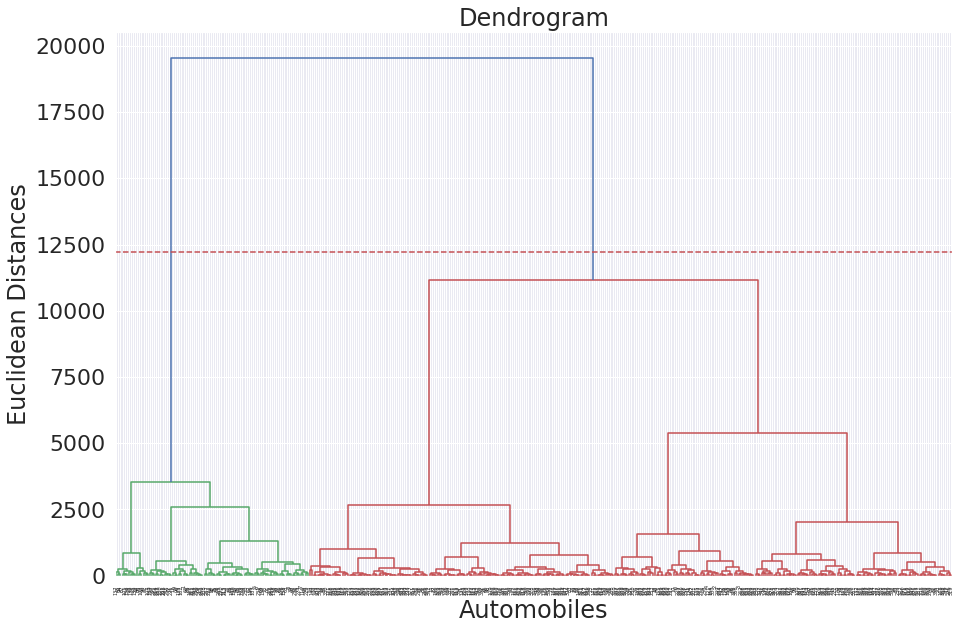

In [59]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Automobiles')
plt.ylabel('Euclidean Distances')
plt.axhline(y=12200, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [51]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(X)
X["mpg"] = cluster

In [57]:
X.mpg.value_counts()


0    306
1     92
Name: mpg, dtype: int64

# **Difference Between k-means Clustering and Heirarchical Clustering**

1. k-means, using a pre-specified  number of clusters, the method  assigns records to each cluster to  find the mutually exclusive cluster  of spherical shape based on distance.

- Hierarchical methods can be either divisive or agglomerative.

2. K Means clustering needed advance knowledge of K i.e. no. of clusters one want to divide your data.

- In hierarchical clustering one can stop at any number of clusters, one find appropriate by interpreting the dendrogram.

3. One can use median or mean as a cluster centre to represent each cluster.

- Agglomerative methods  begin with ‘n’ clusters and sequentially combine similar clusters until only one cluster is obtained.

4. Methods used are normally less computationally intensive and are suited with very large datasets.

- Divisive methods work in the opposite direction, beginning with one cluster that includes all the records and Hierarchical methods are especially useful when the target is to arrange the clusters into a natural hierarchy.

5. In K Means clustering, since one start with random choice of clusters, the results produced by running the algorithm many times may differ.

- In Hierarchical Clustering, results are reproducible in Hierarchical clustering





# Regression models for two different datasets (two clusters)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
#os.chdir('.\\Desktop\\EDUCATE\\DATA CSV')
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [74]:
cluster1_df.drop(['clusters'], axis = 1,inplace=True)

In [75]:
# print the correlation between the mpg and the remaining variables
print('Correlation between mpg and the remaining variables:\n\n{}'.format(cluster1_df.corr().mpg))

Correlation between mpg and the remaining variables:

mpg         1.000000
cyl        -0.303292
disp       -0.486487
hp         -0.107651
wt         -0.581722
acc         0.084281
yr          0.505267
origin      0.278516
car_name    0.088371
Name: mpg, dtype: float64


In [76]:
X = cluster1_df.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = cluster1_df.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [77]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7215389239239136

Test score: 0.6080885042158031

Overall model accuracy: 0.6080885042158031

Mean Squared Error: 12.406429388365641


In [78]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7215389163105528

Test score: 0.6081159871933555

Overall model accuracy: 0.6081159871933555

Mean Squared Error: 12.40555938168287


In [79]:
# we now try to tune the parameters of the ridge model for a better accuracy
# we use a grid search to find the best parameters for the ridge model
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [80]:
# print out the best parameter for ridge and score it on the test and train data

print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.7214680182891526

Test score: 0.6106818625536157


In [81]:
# let's try and fit a Lasso model for the regression
# here, we just move on to making the grid search and find the best parameters
lasso = Lasso()

param['max_iter'] = [1000,10000,100000,1000000]

lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) # initialize the grid search

lasso_search.fit(X_train,y_train)  # fit the model

# print out the best parameters and score it 
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0.1, 'max_iter': 1000}

Train score: 0.7192719595964956

Test score: 0.6132159794797869


In [82]:
# we move on to using the ensemble methods for the regression
# split the unscaled/original X and y data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [83]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [84]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 7}

Train score: 0.6820154738145361

Test score: 0.3791307528636224

Overall model accuracy: 0.3791307528636224

Mean Squared Error: 21.331860085847612


In [85]:
# we now fit a RandomForestRegressor model and perform a grid search to find the best 
# parameters
forest = RandomForestRegressor()

# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)  # fit the model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [86]:
forest_pred = forest_search.predict(xtest)  # make prediction with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))

Best parameter found:
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}

Train score: 0.8983771415933569

Test score: 0.6970209973625856

Overall model accuracy: 0.6970209973625856

Mean Squared Error: 10.409769404783097


In [87]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(xtrain,ytrain)   # fit the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [88]:
gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('Looks like this model is not too overfitted and it has low mean squared error \
so we use this one........')

Best parameter found:
{'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.1}

Train score: 0.9562479197468399

Test score: 0.7082311095755129

Overall model accuracy: 0.7082311095755129

Mean Squared Error: 10.02461174658733

Looks like this model is not too overfitted and it has low mean squared error so we use this one........


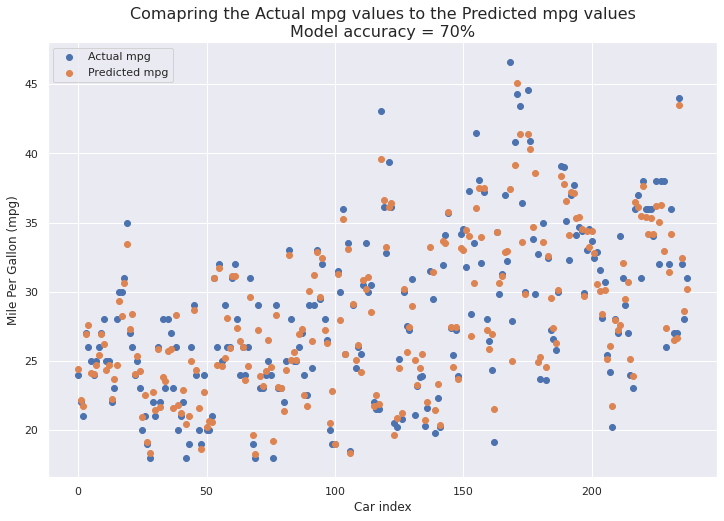

In [92]:
# we will now try to make predictions and see how well our model predicts
# we will visualize the actual mpg values recorded and the mpg values predicted by our 
# model to see how close our predictions are to the actual values.

newcars_new = cluster1_df.drop('mpg',axis=1)  # create a new DataFrame of the feature variables

# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':cluster1_df.mpg.values,
                    'Predicted mpg':gradient_search.predict(newcars_new.values)})


# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 70%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

# Models after dropping highly corelated features

In [97]:
# We can also check for multicollinearity using the variance inflation factor.
# A variable/feature affected by multicollinearity will have a value greater than 5....
#...... when we print out the series from the variance inflation factor
# We will have to do a feature selection to get rid of the multicollinearity.

X1 = sm.tools.add_constant(cluster1_df) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

# Let's drop the columns that highly correlate with each other
newcars = cluster1_df.drop(['cyl','disp','wt'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection....
#..... to see if there's still multicollinearity.
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

print('Series before feature selection: \n\n{}\n'.format(series1))
print('Series after feature selection: \n\n{}'.format(series2))

Series before feature selection: 

const       714.336188
mpg           3.296800
cyl           3.446029
disp          8.707609
hp            1.175108
wt            5.166186
acc           1.132887
yr            2.158525
origin        1.565127
car_name      1.090888
dtype: float64

Series after feature selection: 

const       620.676820
mpg           1.553156
hp            1.071371
acc           1.027909
yr            1.425364
origin        1.265562
car_name      1.088905
dtype: float64


In [98]:
X = newcars.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = newcars.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [99]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(xtrain,ytrain)   # fit the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [100]:
gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('Looks like this model is not too overfitted and it has low mean squared error \
so we use this one........')

Best parameter found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.1}

Train score: 0.998289234291024

Test score: 0.6947142334039063

Overall model accuracy: 0.6947142334039063

Mean Squared Error: 10.489025329028957

Looks like this model is not too overfitted and it has low mean squared error so we use this one........


# Regression on cluster 2 dataset

In [104]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
import xgboost as xgb
import lightgbm as lgb

In [105]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(cluster2_df.drop('mpg', axis=1))
    rmse= np.sqrt(np.abs(cross_val_score(model, cluster2_df.drop('mpg', axis=1).values, cluster2_df['mpg'], scoring="neg_mean_squared_error", cv = kf, n_jobs=-1)))
    return(rmse)

def rtw_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(cluster2_df.drop('mpg', axis=1))
    rtw= cross_val_score(model, cluster2_df.drop('mpg', axis=1).values, cluster2_df['mpg'], scoring="r2", cv = kf, n_jobs=-1)
    return(rtw)

In [106]:
mods = [LinearRegression(),Ridge(),GradientBoostingRegressor(),
      RandomForestRegressor(),BaggingRegressor(),
      xgb.XGBRegressor(), lgb.LGBMRegressor()]

model_df = pd.DataFrame({
    'Model': [type(i).__name__ for i in mods],
    'RMSE': [np.mean(rmsle_cv(i)) for i in mods],    
    'Rmse Std': [np.std(rmsle_cv(i)) for i in mods],
    'R2': [np.mean(rtw_cv(i)) for i in mods],
    'R2 Std': [np.std(rmsle_cv(i)) for i in mods]})
display(model_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True).style.background_gradient(cmap='summer_r'))

,Model,RMSE,Rmse Std,R2,R2 Std
0,RandomForestRegressor,1.925448,0.757601,0.465763,0.766982
1,GradientBoostingRegressor,2.011219,0.691475,0.421635,0.695164
2,BaggingRegressor,2.026227,0.779870,0.421329,0.619095
3,Ridge,2.099232,0.682391,0.379119,0.682391
4,LinearRegression,2.101947,0.679463,0.376226,0.679463
5,XGBRegressor,2.118599,0.905265,0.351559,0.905265
6,LGBMRegressor,2.270384,0.834508,0.270982,0.834508


In [107]:
X_train, X_test, y_train, y_test = train_test_split(cluster2_df.drop('mpg', axis=1),cluster2_df['mpg'], test_size= 0.33, random_state=42)

In [108]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
print(r2_score(y_test, y_pred))

1.786332018351518
0.7139488925513815


In [109]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
print(r2_score(y_test, y_pred))

1.7673677283251357
0.71999027859613


In [110]:
bag_regressor = BaggingRegressor()
bag_regressor.fit(X_train,y_train)
y_predict = bag_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predict))

rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test, y_predict))

1.6456386040362387
0.7572338105389466


1.6504302966548665
0.7558180020870265


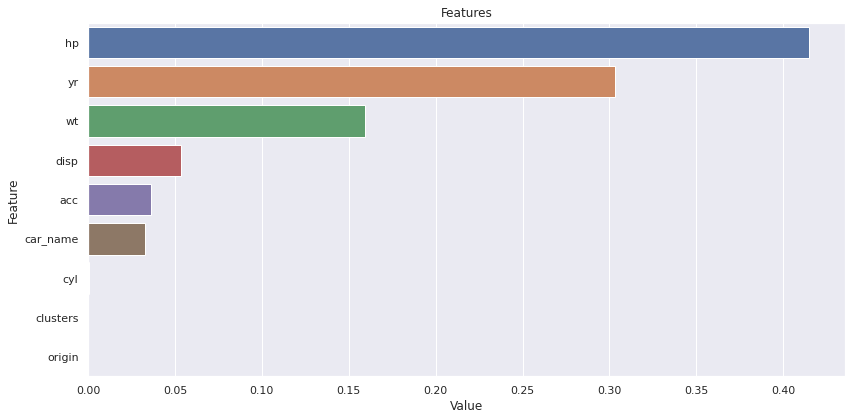

In [112]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train,y_train)
y_predict = gb_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predict))

rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test, y_predict))


feature_imp = pd.DataFrame(sorted(zip(gb_regressor.feature_importances_,cluster2_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

1.6349592055380417
0.760374457000434


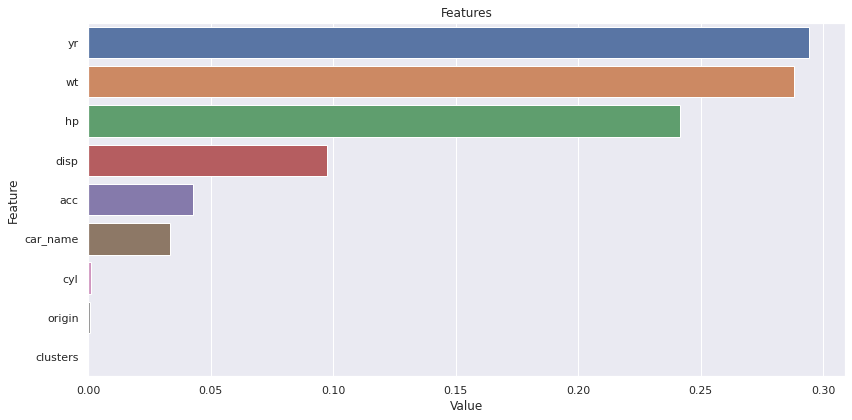

In [114]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
y_predict = rf_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predict))

rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test, y_predict))


feature_imp = pd.DataFrame(sorted(zip(rf_regressor.feature_importances_,cluster2_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

1.7712420498079657
0.7187612907269378


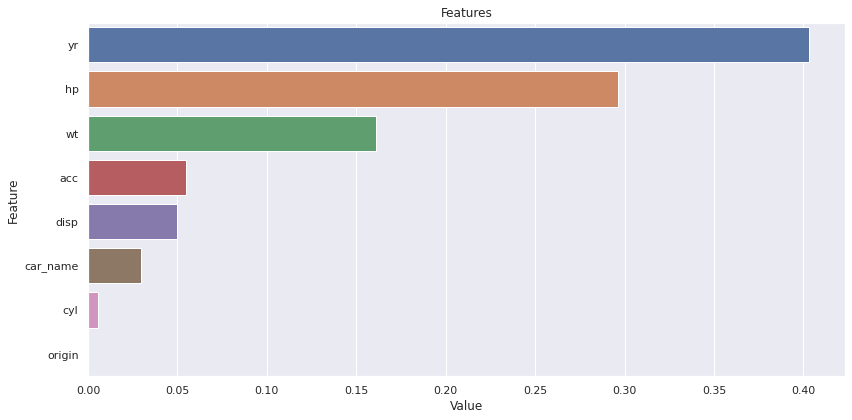

In [116]:
xg_reg=xgb.XGBRegressor(booster='gbtree', objective='reg:squarederror')

xg_reg.fit(X_train,y_train)
xg_y_pred=xg_reg.predict(X_test)
xg_rmse=np.sqrt(mean_squared_error(y_test,xg_y_pred))
print(xg_rmse)
print(r2_score(y_test,xg_y_pred))

feature_imp = pd.DataFrame(sorted(zip(xg_reg.feature_importances_,cluster1_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

1.666712922066395
0.7509761900829122


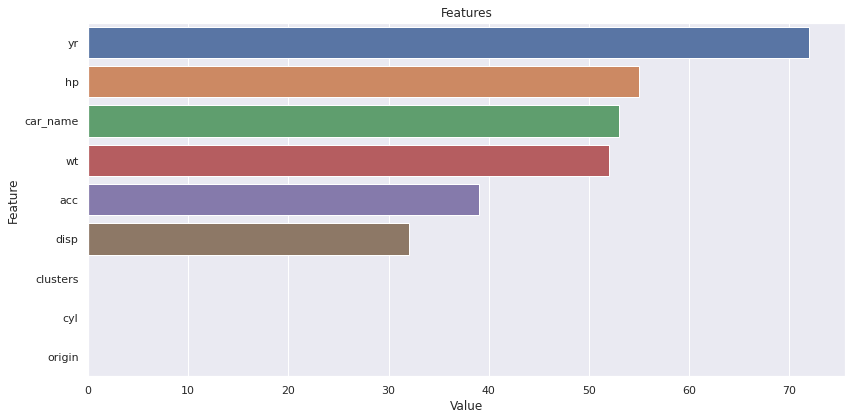

In [117]:
lgb_reg = lgb.LGBMRegressor()

lgb_reg.fit(X_train,y_train)
y_predict=lgb_reg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print(rmse)
print(r2_score(y_test,y_predict))

feature_imp = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_,cluster2_df.drop('mpg', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features')
plt.tight_layout()
plt.show()

In [124]:
X = cluster2_df.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = cluster2_df.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [125]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7362436962822361

Test score: 0.6883649422766602

Overall model accuracy: 0.6883649422766602

Mean Squared Error: 2.5506842544877664


# Model fiiting without making two clusters - On original dataset

In [133]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,15,3504,12.0,70,1,49
1,15.0,8,350.0,33,3693,11.5,70,1,36
2,18.0,8,318.0,27,3436,11.0,70,1,231
3,16.0,8,304.0,27,3433,12.0,70,1,14
4,17.0,8,302.0,22,3449,10.5,70,1,161


In [138]:
final_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,clusters
0,18.0,8,307.0,15,3504,12.0,70,1,49,1
1,15.0,8,350.0,33,3693,11.5,70,1,36,1
2,18.0,8,318.0,27,3436,11.0,70,1,231,1
3,16.0,8,304.0,27,3433,12.0,70,1,14,1
4,17.0,8,302.0,22,3449,10.5,70,1,161,1


In [140]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    int64  
 9   clusters  398 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 31.2 KB


In [141]:
final_df.hp.fillna(final_df.hp.mean(),inplace=True)


In [142]:
# won't be needing the car column so we drop it
cars = final_df.drop('clusters',axis=1)

# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(cars.duplicated().sum()))
print('sum of null values: {}'.format(cars.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64


In [143]:
# We can also check for multicollinearity using the variance inflation factor.
# A variable/feature affected by multicollinearity will have a value greater than 5....
#...... when we print out the series from the variance inflation factor
# We will have to do a feature selection to get rid of the multicollinearity.

X1 = sm.tools.add_constant(cars) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

# Let's drop the columns that highly correlate with each other
newcars = cars.drop(['cyl','disp','wt'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection....
#..... to see if there's still multicollinearity.
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

print('Series before feature selection: \n\n{}\n'.format(series1))
print('Series after feature selection: \n\n{}'.format(series2))

Series before feature selection: 

const       697.469200
mpg           5.663059
cyl          11.849145
disp         20.939092
hp            1.558454
wt           11.889190
acc           1.642807
yr            1.944389
origin        1.853866
car_name      1.180158
dtype: float64

Series after feature selection: 

const       603.351771
mpg           2.770954
hp            1.314498
acc           1.243011
yr            1.629477
origin        1.635530
car_name      1.164890
dtype: float64


In [144]:
X = newcars.drop('mpg',axis=1)  # create a DataFrame of feature/independent variables
y = newcars.mpg   # create a series of the dependent variable

# the feature/independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

LinearRegression()

In [145]:
linear_pred = model.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.6441741101022576

Test score: 0.6189887737744718

Overall model accuracy: 0.6189887737744718

Mean Squared Error: 24.347334662362847


In [146]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.6441741097181755

Test score: 0.6189881846506917

Overall model accuracy: 0.6189881846506917

Mean Squared Error: 24.347372308481503


In [147]:
# we now try to tune the parameters of the ridge model for a better accuracy
# we use a grid search to find the best parameters for the ridge model
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [148]:
# print out the best parameter for ridge and score it on the test and train data

print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.6441702943459349

Test score: 0.6189264409037565


In [149]:
# we move on to using the ensemble methods for the regression
# split the unscaled/original X and y data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [150]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [151]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2}

Train score: 0.87121424887755

Test score: 0.8383339028532284

Overall model accuracy: 0.8383339028532284

Mean Squared Error: 10.317962524113554


In [152]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(xtrain,ytrain)   # fit the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9]})

In [153]:
gradient_pred = gradient_search.predict(xtest)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))
print('Looks like this model is not too overfitted and it has low mean squared error \
so we use this one........')

Best parameter found:
{'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.1}

Train score: 0.9586517473699896

Test score: 0.8311122923627287

Overall model accuracy: 0.8311122923627287

Mean Squared Error: 10.778865012141544

Looks like this model is not too overfitted and it has low mean squared error so we use this one........


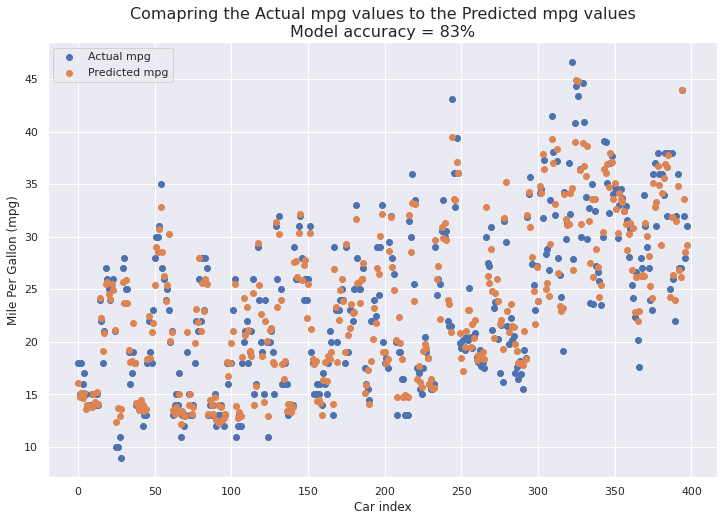

In [155]:
# we will now try to make predictions and see how well our model predicts
# we will visualize the actual mpg values recorded and the mpg values predicted by our 
# model to see how close our predictions are to the actual values.

newcars_new = newcars.drop('mpg',axis=1)  # create a new DataFrame of the feature variables

# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':newcars.mpg.values,
                    'Predicted mpg':gradient_search.predict(newcars_new.values)})


# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 83%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

# How using different models for different clusters will be helpful in this case and how it will be different than using one single model withoutclustering? Mention how it impacts performance and prediction

We got good accuracy when we use single dataset and not seperate dataset based on two clusters.

# Improvisation:

We need to leverage k-fold cross validation and ridge and lasso regularization techniques to reduce overfitting of our model.

We can use ensemble methods to get good accuracy on test dataset.

There are several variables which co-related among themselves. We have to remove them or can do feature engineering based on domain knowledge.